the definition of Reinforcement Learning doesn’t exactly fit under either Supervised or Unsupervised Learning. Supervised Learning is about learning through supervision and training. On the other hand, Unsupervised Learning is actually revealing or discovering insights from unstructured data
One key difference compared to RL is in maximizing the set reward, learning from user interaction, and the ability to update itself in real time. Remember that RL is first about exploring and exploiting. In contrast, both Supervised and Unsupervised Learning can be more about passively learning from historical data (not real time)

RL is particularly useful in many business scenarios such as optimizing click- through rates. How can we maximize the number of clicks for a headline? Take note that news stories often have limited lifespans in terms of their relevance and popularity. Given that limited resource (time), how can we immediately show the best performing headline?
This is also the case in maximising the CTR of online ads. We have a limited ad budget and we want to get the most out of it.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
# %matplotlib inline so plots can show in our Jupyter Notebook

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv') 
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [49]:
# Thompson Sampling. Simply, it addresses the exploration-exploitation dilemma (trying to achieve a balance) 
# by sampling or trying the promising actions while ignoring or discarding actions 
# that are likely to underperform. The algorithm works on probabilities

import random
N = 10000
d = 10
ads_selected = [] 
numbers_of_rewards_1 = [0] * d 
numbers_of_rewards_0 = [0] * d 
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
 
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            ads_selected.append(ad)
            reward = dataset.values[n, ad]            
            if reward == 1:
                numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
            else:
                numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
            total_reward = total_reward + reward    

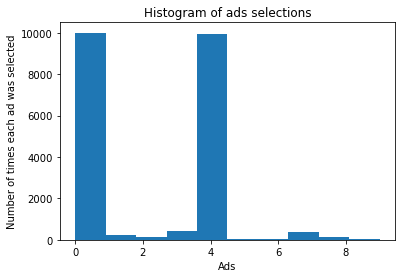

In [50]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()